In [1]:
import sklearn.datasets as datasets
import matplotlib.pyplot as plt
import numpy as np

In [2]:
X, Y = datasets.load_iris(return_X_y=True)

In [3]:
import sklearn.decomposition as decomposition
import sklearn.preprocessing as preprocessing

In [4]:
pca = decomposition.PCA()
pca.fit(X)

PCA()

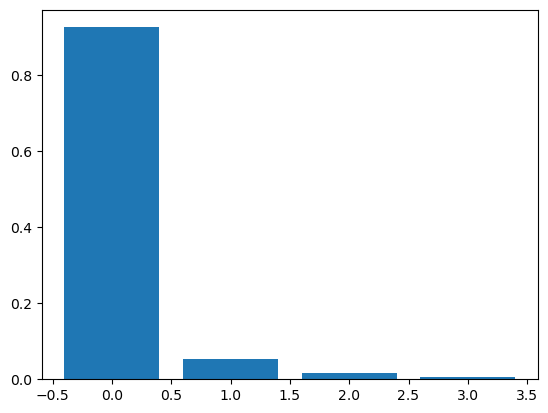

In [5]:
plt.bar(range(4), pca.explained_variance_ratio_)
plt.show()

In [6]:
U = pca.transform(X)
U = U[:,:2]

In [7]:
U2 = U[Y != 0]
Y2 = Y[Y != 0]

In [8]:
np.putmask(Y2, Y2 == 1, -1)
np.putmask(Y2, Y2 == 2, +1)

In [9]:
Y2 = Y2.astype('d')

In [10]:
U2 = preprocessing.scale(U2)

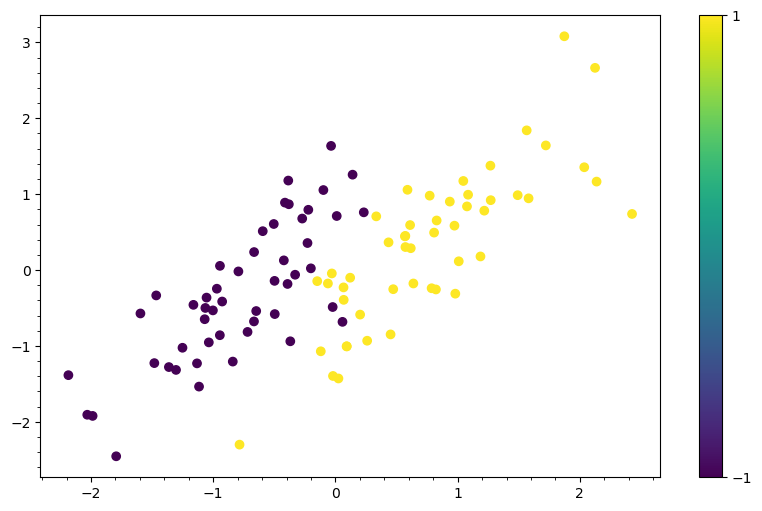

In [11]:
plt.figure(figsize=(10,6))
sc = plt.scatter(U2[:,0], U2[:,1], c=Y2)
plt.colorbar(sc,ticks=[-1,+1])
plt.minorticks_on()
plt.show()

In [12]:
import mlgrad.loss as loss
import mlgrad.funcs as funcs
import mlgrad.models as models
import mlgrad.funcs2 as funcs2
from mlgrad.cls import classification_as_regr
import mlgrad.plots as plots

In [31]:
body = models.FFNetworkModel()
body.add(models.LinearLayer(2, 100))
body.add(models.ScaleLayer(funcs.Sigmoidal(5.0), 100))
head = models.LinearModel(body.n_output)
nnmod = models.FFNetworkFuncModel(head, body)

In [32]:
nnmod.allocate()
nnmod.init_param()

In [49]:
alg = classification_as_regr(U2, Y2, nnmod,
                             lossfunc=loss.MarginLoss(funcs.Hinge(1.0)),
                             # regnorm=funcs2.SquareNorm(), tau=0.0001,
                             h=0.001)

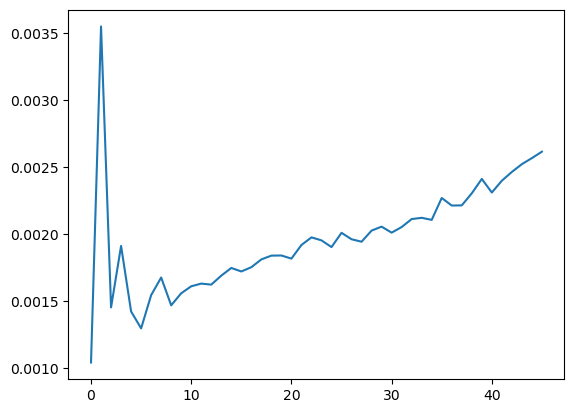

In [50]:
plt.plot(alg.lvals)
plt.show()

In [51]:
def calc_zz(mod, min_val, max_val):
    xrange = np.linspace(min_val, max_val, 101)
    yrange = np.linspace(min_val, max_val, 101)
    XX, YY = np.meshgrid(xrange, yrange)
    XY = np.c_[XX.ravel(), YY.ravel()]
    ZZ = mod.evaluate_all(XY)
    ZZ = ZZ.reshape(XX.shape)
    return ZZ

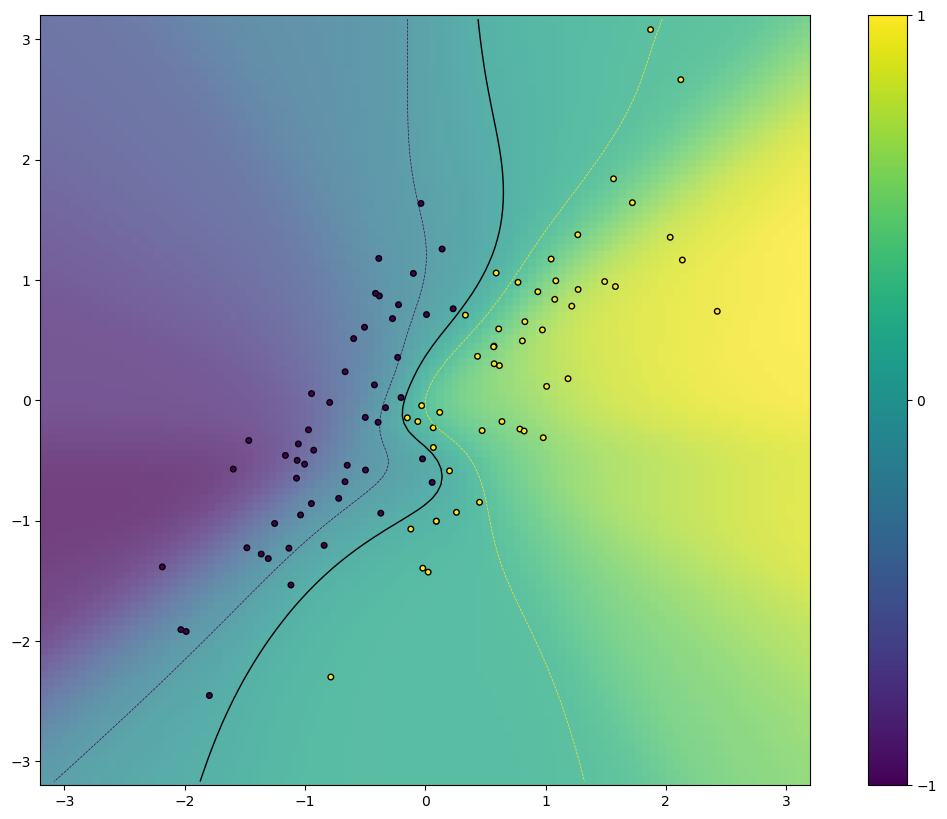

In [52]:
ZZ = calc_zz(nnmod, -3.2, 3.2)
plt.figure(figsize=(15,10))
cs = plt.scatter(U2[:,0], U2[:,1], c=Y2, edgecolors='k', s=16)
plt.imshow(ZZ, origin='lower', extent=(-3.2, 3.2,-3.2, 3.2), alpha=0.75)
plt.colorbar(cs, ticks=[-1,0,1])
plt.contour(ZZ, levels=[0], origin='lower', extent=(-3.2, 3.2,-3.2, 3.2), linewidths=1, colors='k')
plt.contour(ZZ, levels=[-5,5], origin='lower', extent=(-3.2, 3.2,-3.2, 3.2), linewidths=0.5, linestyles='--')
# plt.xlim(-2,2)
# plt.ylim(-2,2)
plt.show()

In [53]:
from sklearn.metrics import accuracy_score

In [54]:
accuracy_score(Y2, np.sign(nnmod.evaluate_all(U2)))

1.0

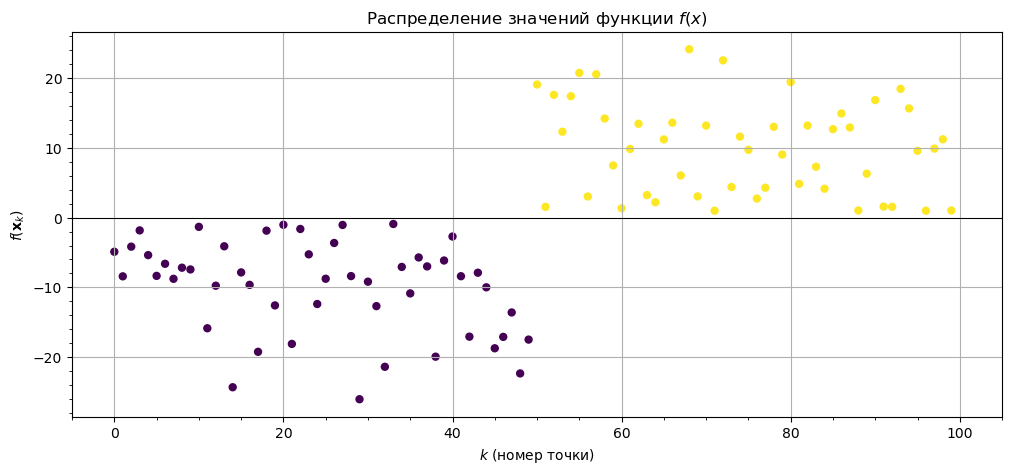

In [55]:
plt.figure(figsize=(12,5))
plots.plot_cls_function(nnmod, U2, Y2)
plt.show()